In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
titanic_dataset = pd.read_csv("titanic_train.csv")
titanic_dataset.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


## quality needed
1. check the info of dataset for see information of data
2. check the unique values
3. create the graphs to find the realtion between the parameters
4. remove the outliers in age also convert into integers
5. drop the unwanted columns
6. convert the sex , embarked column into or(0,1)
7. concat the convert column into orignal dataset
8. at last test and train the model with logistic regression

In [3]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_dataset["Pclass"].unique()

array([3, 1, 2], dtype=int64)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

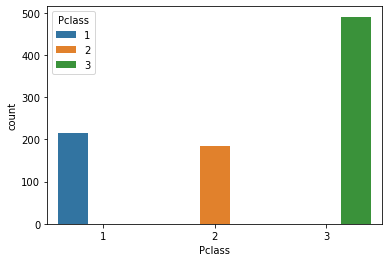

In [5]:
sns.countplot(x= "Pclass", data = titanic_dataset, hue="Pclass")

In [6]:
titanic_dataset["Survived"].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Survived', ylabel='count'>

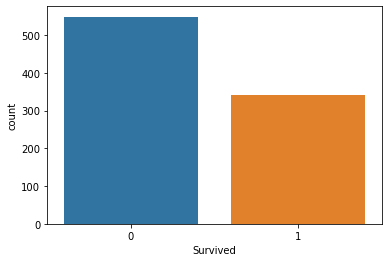

In [7]:
sns.countplot(x= "Survived", data = titanic_dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

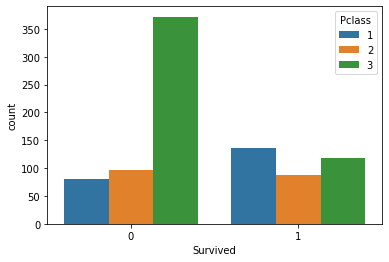

In [8]:
sns.countplot(x= "Survived", data = titanic_dataset, hue = "Pclass")

In [9]:
titanic_dataset["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

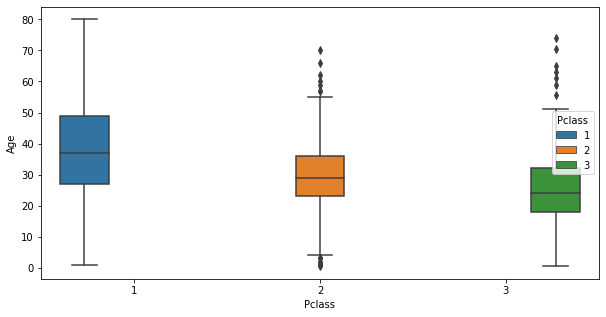

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x= "Pclass", y = "Age", data = titanic_dataset, hue = 'Pclass')

##  remove the age outliers

In [11]:
def age_remove_outliers(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 34
        elif Pclass ==2:
            return 25
        else:
            return 20
        
    else:
        return Age

In [12]:
titanic_dataset["Age"] = titanic_dataset[["Age", "Pclass"]].apply(age_remove_outliers, axis = 1)

In [13]:
titanic_dataset["Age"].unique()

array([22.  , 38.  , 26.  , 35.  , 20.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 39.  , 55.  , 25.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [14]:
titanic_dataset["Age"] = titanic_dataset["Age"].astype(int)

In [15]:
titanic_dataset["Age"].unique()

array([22, 38, 26, 35, 20, 54,  2, 27, 14,  4, 58, 39, 55, 25, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17,
       32, 16,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [16]:
titanic_dataset = titanic_dataset[titanic_dataset["Age"]>=5]

In [17]:
titanic_dataset["Age"].unique()

array([22, 38, 26, 35, 20, 54, 27, 14, 58, 39, 55, 25, 31, 34, 15, 28,  8,
       19, 40, 66, 42, 21, 18,  7, 49, 29, 65,  5, 11, 45, 17, 32, 16, 30,
       33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51, 44, 61, 56, 50,
       62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57, 80,  6, 74])

<AxesSubplot:xlabel='Survived', ylabel='count'>

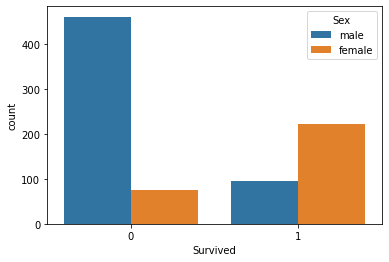

In [18]:
sns.countplot(x= "Survived", data = titanic_dataset, hue = "Sex")

In [19]:
titanic_dataset.drop(["Name", "Parch","Ticket"],axis = 1, inplace = True)

In [20]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,1,0,3,male,22,1,7.2500,NaN,S
1,2,1,1,female,38,1,71.2833,C85,C
2,3,1,3,female,26,0,7.9250,NaN,S
3,4,1,1,female,35,1,53.1000,C123,S
4,5,0,3,male,35,0,8.0500,NaN,S


In [21]:
sex_column = pd.get_dummies(titanic_dataset["Sex"], drop_first=True)

In [22]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
0,1,0,3,male,22,1,7.2500,NaN,S
1,2,1,1,female,38,1,71.2833,C85,C
2,3,1,3,female,26,0,7.9250,NaN,S
3,4,1,1,female,35,1,53.1000,C123,S
4,5,0,3,male,35,0,8.0500,NaN,S


In [23]:
embarked_column = pd.get_dummies(titanic_dataset["Embarked"], drop_first=True)

In [24]:
embarked_column

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [25]:
titanic_dataset.drop(["Embarked", "Sex"], axis = 1, inplace = True)

In [26]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Fare,Cabin
0,1,0,3,22,1,7.2500,NaN
1,2,1,1,38,1,71.2833,C85
2,3,1,3,26,0,7.9250,NaN
3,4,1,1,35,1,53.1000,C123
4,5,0,3,35,0,8.0500,NaN


In [27]:
titanic_dataset.drop(["Cabin"], axis = 1, inplace  =True)

In [28]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
0,1,0,3,22,1,7.2500
1,2,1,1,38,1,71.2833
2,3,1,3,26,0,7.9250
3,4,1,1,35,1,53.1000
4,5,0,3,35,0,8.0500


In [29]:
titanic_dataset = pd.concat([titanic_dataset,sex_column, embarked_column], axis = 1)

In [30]:
titanic_dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Fare,male,Q,S
0,1,0,3,22,1,7.2500,1,0,1
1,2,1,1,38,1,71.2833,0,0,0
2,3,1,3,26,0,7.9250,0,0,1
3,4,1,1,35,1,53.1000,0,0,1
4,5,0,3,35,0,8.0500,1,0,1


In [31]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  851 non-null    int64  
 1   Survived     851 non-null    int64  
 2   Pclass       851 non-null    int64  
 3   Age          851 non-null    int32  
 4   SibSp        851 non-null    int64  
 5   Fare         851 non-null    float64
 6   male         851 non-null    uint8  
 7   Q            851 non-null    uint8  
 8   S            851 non-null    uint8  
dtypes: float64(1), int32(1), int64(4), uint8(3)
memory usage: 85.7 KB


In [32]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Fare,male,Q,S
count,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000,851.000000
mean,447.501763,0.370153,2.297297,29.519389,0.467685,32.194579,0.650999,0.088132,0.720329
std,256.305573,0.483129,0.842813,12.543310,1.049292,50.422921,0.476935,0.283653,0.449101
min,1.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,227.500000,0.000000,1.500000,20.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,450.000000,0.000000,3.000000,26.000000,0.000000,13.500000,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,36.000000,1.000000,30.695800,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,512.329200,1.000000,1.000000,1.000000


In [33]:
titanic_dataset.shape

(851, 9)

## train and testing of model

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [35]:
x= titanic_dataset.drop('Survived', axis = 1)
y = titanic_dataset["Survived"]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state= 45)

In [37]:
lr= LogisticRegression()

In [38]:
lr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
prediction = lr.predict(x_test)

In [40]:
from sklearn import metrics

In [41]:
metrics.confusion_matrix(y_test,prediction)

array([[136,  22],
       [ 39,  59]], dtype=int64)

In [42]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       158
           1       0.73      0.60      0.66        98

    accuracy                           0.76       256
   macro avg       0.75      0.73      0.74       256
weighted avg       0.76      0.76      0.76       256



In [43]:
import pickle

In [47]:
pickle.dump(lr,open("titanic.sav", "wb"))

## dump the model in pickel to make api

In [48]:
loaded_model  = pickle.load(open("titanic.sav", "rb"))
loaded_model

LogisticRegression()